2024-08-10

# Weird shapes for Burning Man keychains

In [1]:
from IPython.display import SVG, display

In [39]:
import numpy as np
from einops import rearrange, reduce, repeat, einsum

In [236]:
def randomfractal(k=3, res=20, r0=5, l0=3, c=30, pwr=1.25):
    # [k]
    phases = np.random.random(k) * 2 * np.pi
    
    # [res]
    ts = np.linspace(0, 2*np.pi, res)
    # [k]
    ls = l0 * np.arange(1, k+1) #np.pow(2., np.arange(1, k+1))
    
    rs = r0 + reduce(repeat(1/np.pow(ls, pwr), f'k -> k {res}') * np.cos(einsum(ls, ts, 'k, r -> k r') + repeat(phases, f'k -> k {res}')), 'k r -> r', 'sum')

    xs = c * rs * np.cos(ts)
    ys = c * rs * np.sin(ts)
    
    return rearrange(np.array([xs, ys]), 'p r -> r p')

In [258]:
def render(points):
    minx = min([pt[0] for pt in points])
    miny = min([pt[1] for pt in points])
    maxx = max([pt[0] for pt in points])
    maxy = max([pt[1] for pt in points])
    
    mysvg = f"""\
    <svg width="500" height="500" viewBox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}">
    <polyline fill='red' stroke='black' points="{' '.join([f'{pt[0]},{pt[1]}' for pt in points])}"/>
    </svg>"""

    return mysvg

In [346]:
def renders(pointses):
    points = sum([list(pts) for pts in pointses],start=[])
    minx = min([pt[0] for pt in points])
    miny = min([pt[1] for pt in points])
    maxx = max([pt[0] for pt in points])
    maxy = max([pt[1] for pt in points])
    
    mysvg = f"""\
    <svg width="500" height="500" viewBox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}">"""
    
    for points in pointses:
        mysvg += f"""<polyline fill='red' stroke='black' points="{' '.join([f'{pt[0]},{pt[1]}' for pt in points])}"/>"""
    
    mysvg += """</svg>"""

    return mysvg

In [340]:
def gridify(pointses, gauge=1.1):
    xs0 = pointses[0][:, 0]
    side = max(xs0) - min(xs0)

    width = int(np.ceil(np.sqrt(len(pointses))))
    height = int(np.ceil(len(pointses) / width))

    newpointses = []
    
    for k, points in enumerate(pointses):
        i, j = k // width, k % width
        newpointses.append(points + np.array([gauge * i * side, gauge * j * side]))

    return newpointses

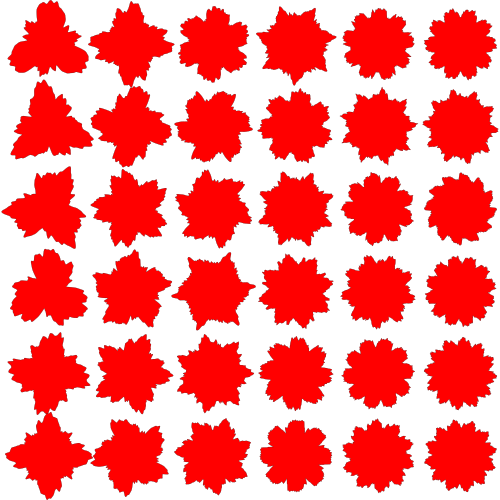

In [390]:
ptss = []
for nn in [3, 4, 5, 6, 7, 8, 9, 10, 12]:
    for i in range(4):
        points = randomfractal(l0=nn, res=500, k=20, r0=np.sqrt(3/nn), c=100*np.sqrt(nn))
        ptss.append(points)
display(SVG(data=renders(gridify(ptss, gauge=1.02))))

In [384]:
with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/tokens/blank_6x6_C.svg', 'w') as f:
    f.write(renders(gridify(ptss)))

In [ ]:
for nn in [3, 4, 5, 6, 7, 8, 10, 12]:
    for i in range(10):
        nn=7
        data = render(randomfractal(l0=nn, res=500, k=20, r0=np.sqrt(3/nn), c=100*np.sqrt(nn)))
        with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/tokens/token_.svg', 'w') as f:
            f.write(data)